<a href="https://colab.research.google.com/github/sanu4satyam/Capstone_Projects/blob/main/Spam_Ham_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p> 
About DataSet
</p>
The dataset collection is composed by just one text file, where each line has the correct class followed by the raw message.

### Importing and Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['v1','v2']]
df.rename(columns={'v1':'Class', 'v2':'sms'}, inplace=True)
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Counting The Ham/Spam instances and Plotting

In [6]:
ham_spam = df['Class'].value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

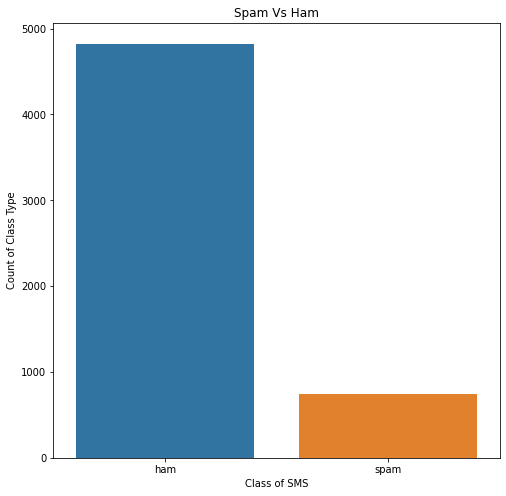

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(df['Class'])
plt.title("Spam Vs Ham")
plt.ylabel("Count of Class Type")
plt.xlabel("Class of SMS")
plt.show()

In [8]:
print("The rate of Spammed SMS is: ", round(ham_spam[1]/(ham_spam[0]+ham_spam[1])*100),'%')

The rate of Spammed SMS is:  13 %


Mapping Class into Labels of 0 & 1. Then Dropping the Class.

In [9]:
df['label'] = df['Class'].map({'ham':0, 'spam':1})

In [10]:
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df = df.drop('Class', axis=1)
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Creating Input and Target Variables.

In [12]:
X = df['sms']
y = df['label']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


Splitting The DataFrame into Training and Testing.

In [13]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [14]:
X_train.head()

4393    Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
216      Tired. I haven't slept well the past few nights.
4471      3. You have received your mobile content. Enjoy
3889    Double Mins & 1000 txts on Orange tariffs. Lat...
5030     Hey... Very inconvenient for your sis a not huh?
Name: sms, dtype: object

In [15]:
y_train.head()

4393    0
216     0
4471    1
3889    1
5030    0
Name: label, dtype: int64

**Vectorizing the sentences.
Removing stop words**

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [17]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

Transforming the train and test datasets

In [18]:
X_train_tf = vect.transform(X_train)
X_test_tf = vect.transform(X_test)

The Matrix of CountVectorizer.
Inside CountVectorizer, these words are not stored as strings. Rather, they are given a particular index value.

In [19]:
count_array = X_train_tf.toarray()
df = pd.DataFrame(data=count_array,columns = vect.get_feature_names())
df.head()

,00,000,008704050406,0121,0125698789,02,0207,02072069400,02073162414,02085076972,...,åòit,åômorrow,ì_,ìï,ó_,û_,ûªve,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(type(X_train_tf))
print(X_train_tf)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1056)	1
  (0, 1854)	1
  (0, 4058)	1
  (0, 4263)	1
  (0, 6601)	1
  (1, 3017)	1
  (1, 4308)	1
  (1, 4575)	1
  (1, 5585)	1
  (1, 6217)	1
  (2, 1780)	1
  (2, 2346)	1
  (2, 4093)	1
  (2, 5042)	1
  (3, 47)	1
  (3, 239)	1
  (3, 1251)	1
  (3, 1434)	1
  (3, 2192)	1
  (3, 2688)	1
  (3, 3078)	1
  (3, 3629)	1
  (3, 4045)	1
  (3, 4097)	1
  (3, 4145)	1
  :	:
  (3895, 1559)	1
  (3895, 3076)	1
  (3895, 3625)	1
  (3895, 5125)	1
  (3895, 5687)	1
  (3896, 1546)	1
  (3896, 2026)	1
  (3896, 3441)	1
  (3896, 3686)	1
  (3896, 4203)	1
  (3896, 4419)	2
  (3896, 4688)	1
  (3896, 6871)	1
  (3897, 3189)	1
  (3897, 4477)	1
  (3897, 4529)	1
  (3897, 6173)	1
  (3898, 1709)	1
  (3898, 2932)	1
  (3898, 3831)	1
  (3898, 4419)	1
  (3898, 4851)	1
  (3898, 6458)	1
  (3899, 1565)	1
  (3899, 5625)	1


The identified Unique words along with their indices

In [21]:
print(vect.vocabulary_)

{'baaaaaaaabe': 1056, 'wake': 6601, 'miss': 4058, 'crave': 1854, 'need': 4263, 'tired': 6217, 'haven': 3017, 'slept': 5585, 'past': 4575, 'nights': 4308, 'received': 5042, 'mobile': 4093, 'content': 1780, 'enjoy': 2346, 'double': 2192, 'mins': 4045, '1000': 239, 'txts': 6382, 'orange': 4471, 'tariffs': 6049, 'latest': 3629, 'motorola': 4145, 'sonyericsson': 5675, 'nokia': 4332, 'bluetooth': 1251, 'free': 2688, 'mobileupd8': 4097, '08000839402': 47, 'call2optout': 1434, 'hf8': 3078, 'hey': 3076, 'inconvenient': 3280, 'sis': 5550, 'huh': 3189, 'll': 3746, 'going': 2854, 'sch': 5328, 'mon': 4117, 'smth': 5629, 'foot': 2646, 'work': 6796, 'babe': 1058, 'friend': 2707, 'cancel': 1459, 'visit': 6556, 'people': 4608, 'special': 5716, 'sight': 5520, 'remain': 5094, 'till': 6208, 'maintain': 3894, 'life': 3693, 'ends': 2336, 'sh': 5431, 'jas': 3413, 'sorry': 5687, 'santa': 5297, 'calling': 1443, 'little': 3738, 'ones': 4443, 'like': 3703, 'xmas': 6852, 'eve': 2404, '09077818151': 222, 'book': 1

In [22]:
# vocab size
len(vect.vocabulary_.keys())

6942

Creating a list of all the Unique Words & Visualizing it using WordCloud

In [23]:
u_words= list((vect.vocabulary_.keys()))

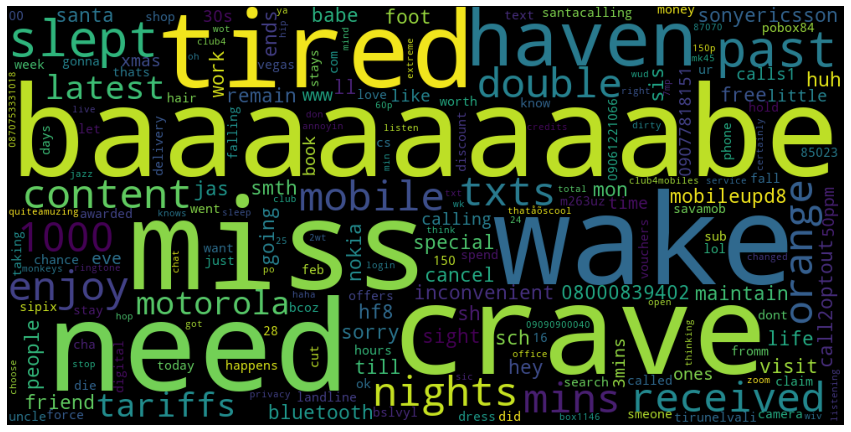

In [24]:
from wordcloud import WordCloud
from collections import Counter

word_could_dict=Counter(u_words)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###   Building and Training various Classification Models

**LOGISTIC REGRESSION**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR = LogisticRegression()

In [27]:
LR.fit(X_train_tf, y_train)

LogisticRegression()

In [28]:
y_pred = LR.predict(X_test_tf)

In [29]:
print(y_pred)

[0 0 0 ... 0 0 0]


Model Evaluation

In [30]:
LR.score(X_test_tf,y_test)

0.9808612440191388

R2 Score for Testing Data

In [31]:
from sklearn.metrics import accuracy_score, r2_score
print(r2_score(y_test, y_pred))

0.8312027560794014


**NAIVE BAYES CLASSIFIER**

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
MNB = MultinomialNB()

In [34]:
MNB.fit(X_train_tf, y_train)

MultinomialNB()

Model Evaluation

In [35]:
y_pred1 = MNB.predict(X_test_tf)

In [36]:
print(y_pred1)

[0 0 0 ... 1 0 0]


In [37]:
print("The Accuracy Score is: ",accuracy_score(y_test, y_pred1))

The Accuracy Score is:  0.9850478468899522


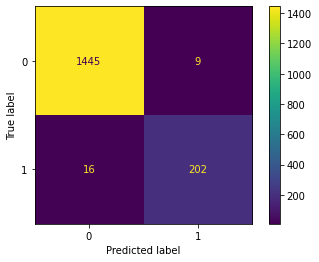

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c_m1 = confusion_matrix(y_test, y_pred1)
D_m1 = ConfusionMatrixDisplay(confusion_matrix=c_m1, display_labels=MNB.classes_)
D_m1.plot()
plt.show()

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1454
           1       0.96      0.93      0.94       218

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.98      0.99      0.98      1672



**DECISION TREE CLASSIFIER**

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DTC = DecisionTreeClassifier()

In [43]:
DTC.fit(X_train_tf, y_train)

DecisionTreeClassifier()

Model Evaluation

In [44]:
y_pred2 = DTC.predict(X_test_tf)

In [45]:
print(y_pred2)

[0 0 0 ... 0 0 0]


In [46]:
print("The Accuracy Score is: ",accuracy_score(y_test, y_pred2))

The Accuracy Score is:  0.9736842105263158


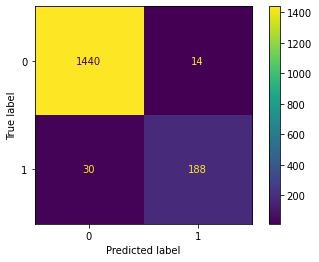

In [47]:
c_m2 = confusion_matrix(y_test, y_pred2)
D_m2 = ConfusionMatrixDisplay(confusion_matrix=c_m2, display_labels=DTC.classes_)
D_m2.plot()
plt.show()

In [48]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1454
           1       0.93      0.86      0.90       218

    accuracy                           0.97      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



**KNN Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [51]:
KNN.fit(X_train_tf, y_train)

KNeighborsClassifier()

Model Evaluation

In [52]:
y_pred3 = KNN.predict(X_test_tf)

In [53]:
print(y_pred3)

[0 0 0 ... 0 0 0]


In [54]:
print("The Accuracy Score is: ",accuracy_score(y_test, y_pred3))

The Accuracy Score is:  0.9120813397129187


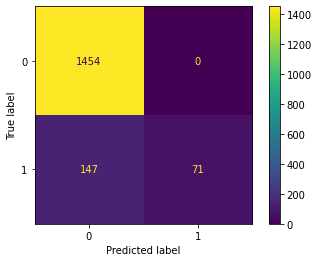

In [55]:
c_m3 = confusion_matrix(y_test, y_pred3)
D_m3 = ConfusionMatrixDisplay(confusion_matrix=c_m3, display_labels=DTC.classes_)
D_m3.plot()
plt.show()

In [56]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1454
           1       1.00      0.33      0.49       218

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.72      1672
weighted avg       0.92      0.91      0.89      1672



**RANDOM FOREST CLASSIFIER**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF = RandomForestClassifier(n_estimators = 90)

In [59]:
RF.fit(X_train_tf, y_train)

RandomForestClassifier(n_estimators=90)

Model Evaluation

In [60]:
y_pred4 = RF.predict(X_test_tf)

In [61]:
print(y_pred4)

[0 0 0 ... 0 0 0]


In [62]:
print("The Accuracy Score is: ",accuracy_score(y_test, y_pred3))

The Accuracy Score is:  0.9120813397129187


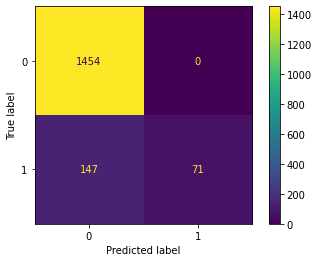

In [63]:
c_m3 = confusion_matrix(y_test, y_pred3)
D_m3 = ConfusionMatrixDisplay(confusion_matrix=c_m3, display_labels=DTC.classes_)
D_m3.plot()
plt.show()

In [64]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1454
           1       1.00      0.33      0.49       218

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.72      1672
weighted avg       0.92      0.91      0.89      1672



The Best Model among these is **Multinomial Naive Bayes** with the accuracy score of:  **98%**

*Submitted By:- Sanu Satyam*